In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

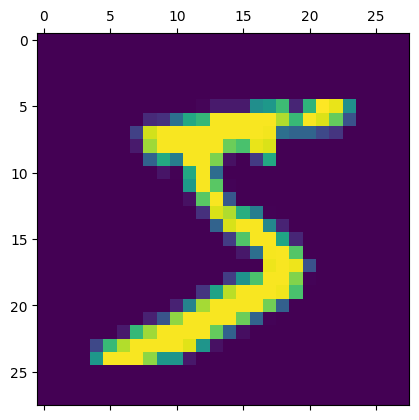

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
# normalize to improve the loss, less number of epcochs
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
# need to flat the 28 * 28 grid before feeding to the model (need to get [ , , , , *784] vector)
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_train_flattened[0].shape

(784,)

In [15]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
y_train.shape

(60000,)

In [17]:
# Dense: all the nodes in one layer is connected to all nodes in the next layer = FCN
# keras.layers.Dense(number of multi classes, shape of input vector, activation function)

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# adam (adaptive momentum): a technique to give momentum to go to global optimum (or best possible momentum)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 1 epoch: how many times to go through the data set (update weights each time)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4658 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3044 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9254


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2694 - accuracy: 0.9257


[0.2694374918937683, 0.9257000088691711]

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]
# the seventh/[6] value shows the highest number - 9.997-01 ---> 7

313/313 [==============================] - 0s 1ms/step


array([1.9124683e-02, 3.1592339e-07, 6.1945949e-02, 9.6129769e-01,
       1.7911718e-03, 1.2100848e-01, 1.6999124e-06, 9.9983323e-01,
       1.2867866e-01, 5.6787491e-01], dtype=float32)

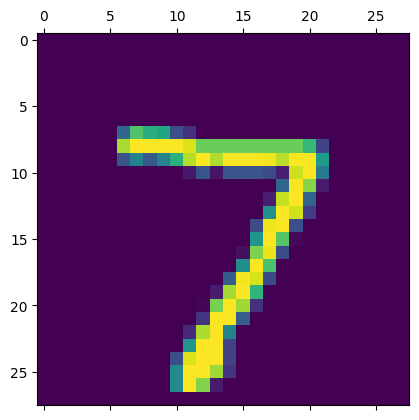

In [21]:
plt.matshow(X_test[0])

In [22]:
np.argmax(y_predicted[0])

7

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    5,    7,    3,    3,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   3,    8,  922,   17,    7,    3,   13,   12,   45,    2],
       [   1,    0,   19,  927,    0,   21,    2,   11,   24,    5],
       [   1,    1,    3,    2,  916,    0,   14,    6,   12,   27],
       [   7,    1,    2,   36,    8,  766,   19,    9,   38,    6],
       [   6,    3,    5,    1,    7,    7,  923,    2,    4,    0],
       [   1,    5,   21,    7,    4,    0,    0,  964,    5,   21],
       [   3,    6,    6,   18,    8,   19,   11,   14,  885,    4],
       [   9,    5,    1,   10,   29,    8,    0,   43,   15,  889]])>

Text(95.72222222222221, 0.5, 'Truth')

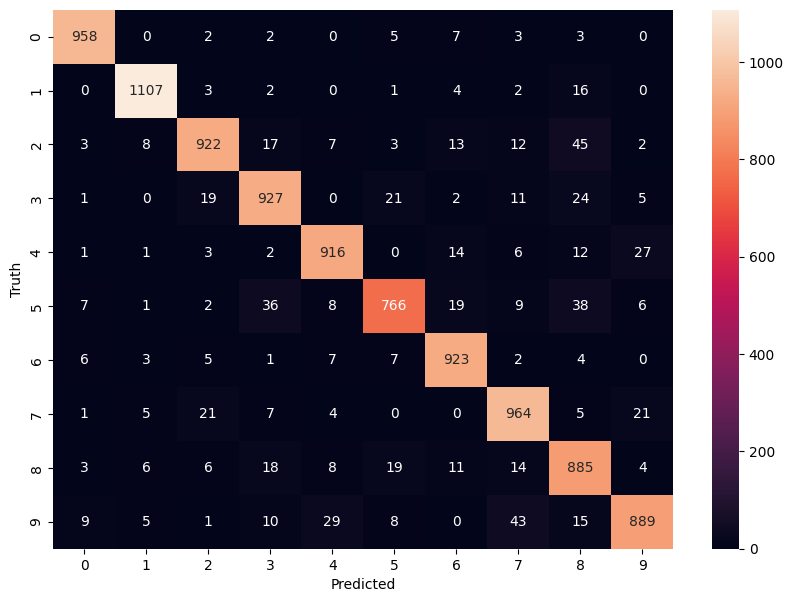

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# diagonal values should go higher from 00 to 99

In [26]:
# hidden layer with 100 nodes, now 3 layers
# performs better hidden layer with relu function
# performs better when outer layer with sigmoid

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2825 - accuracy: 0.9193
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1277 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0893 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0670 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9842


by implemting another layer accuracy is improved

In [27]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0804 - accuracy: 0.9755


[0.08042094856500626, 0.9754999876022339]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

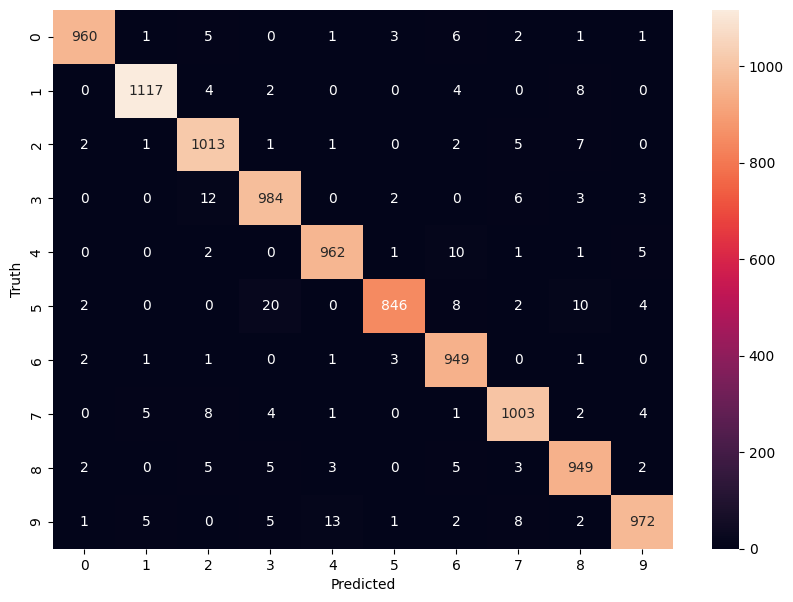

In [28]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
# in here, in-built function was used to flat the layer

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2650 - accuracy: 0.9251
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1217 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0875 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0661 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0529 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0433 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0339 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0288 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0248 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.020

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9792


[0.07391418516635895, 0.979200005531311]

In [36]:
import numpy as np
from PIL import Image
from tensorflow import keras


def predict_digit(img):
    # Resize image to 28x28 pixels
    img = img.resize((28, 28))
    # Convert to grayscale
    img = img.convert('L')
    img = np.array(img)
    # Reshape to match the model's input shape and normalize
    img = img.reshape(1, 28, 28)  # Shape should match the input shape of the model
    img = img / 255.0
    # Predicting the class
    res = model.predict(img)
    predicted_digit = np.argmax(res)
    confidence = max(res[0])
    return predicted_digit


In [34]:
import os

1/1 [==============================] - 0s 24ms/step


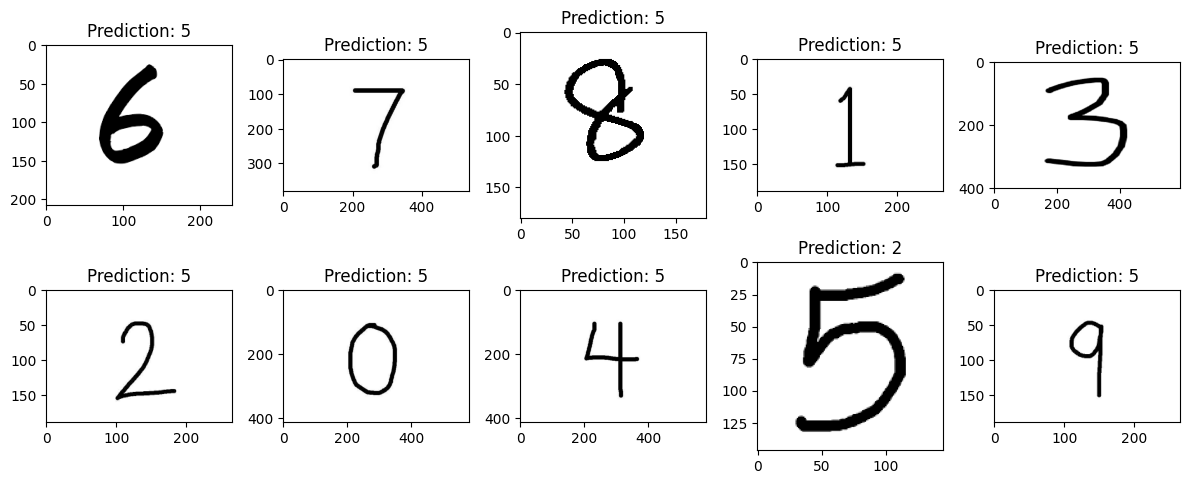

In [37]:
image_folder = "images"
image_files = os.listdir(image_folder)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

# show the prediction for each image on a grid
for i, image_file in enumerate(image_files):
    if i < 10:  
        row = i // 5  
        col = i % 5   
        
        img = Image.open(os.path.join(image_folder, image_file))
        digit= predict_digit(img)
        
        axes[row, col].imshow(img)
        axes[row, col].set_title(f"Prediction: {digit}", fontsize=12)

plt.tight_layout()
plt.show()

AttributeError: 'NoneType' object has no attribute 'convert'

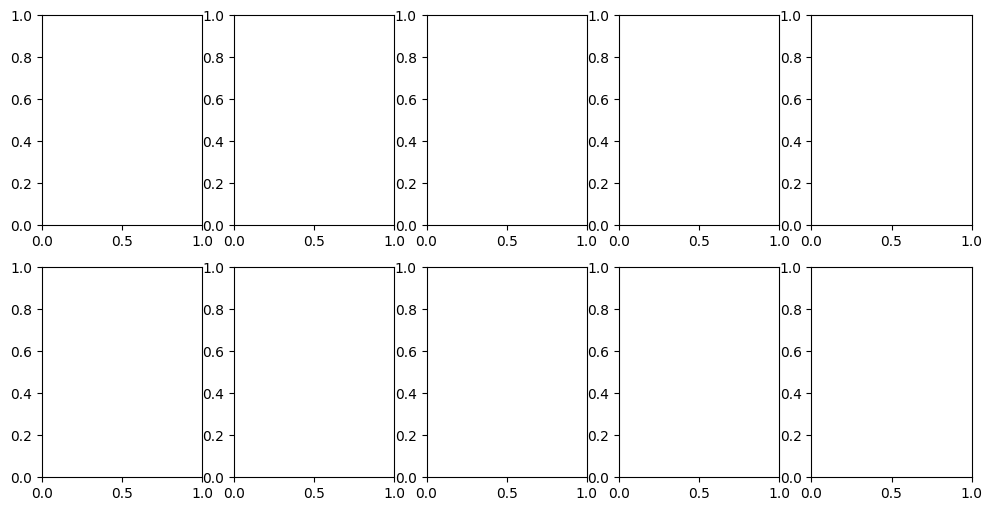

In [42]:
# Select 10 random test images for prediction
num_samples = len(X_test)
if num_samples < 10:
    print("Error: Not enough test samples available.")
    exit()

selected_indices = np.random.choice(num_samples, 10, replace=False)
selected_images = X_test[selected_indices]

# Create a function to predict and display digits
def predict_and_display(images):
    num_samples = len(images)
    num_rows = int(np.ceil(num_samples / 5))
    
    fig, axes = plt.subplots(num_rows, 5, figsize=(12, 3 * num_rows))
    
    for i, ax in enumerate(axes.flat):
        if i < num_samples:
            img = images[i]
            if img is not None:
                digit, confidence = predict_digit(img)
                ax.imshow(img, cmap='gray')
                ax.set_title(f"Prediction: {digit}\nConfidence: {confidence:.2f}", fontsize=12)
            else:
                print(f"Error: Unable to process image {i + 1}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the predict_and_display function with the selected test images
predict_and_display(selected_images)
# This code includes error handling to print a message if an image cannot be processed. Make sure that X_test contains valid image data, and ensure that the predict_digit function processes the images correctly.





